# Homework 2
###### Data Mining <br>Ross Lewis

#### Question 1

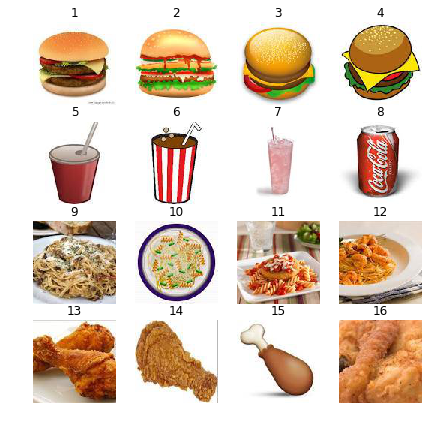

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2

pca = PCA(numComponents)
pca.fit(imgData)
projected = pca.transform(imgData)

projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,-1576.667016,6641.462674,burger
2,-493.825788,6396.184274,burger
3,990.057233,7236.840769,burger
4,2189.898458,9051.034582,burger
5,-7843.064019,-1061.583683,drink
6,-8498.435161,-5438.442879,drink
7,-11181.787910,-5319.885107,drink
8,-6851.941725,1124.542067,drink
9,7635.140046,-5043.628374,pasta
10,-708.061138,-528.765053,pasta


Finally, we draw a scatter plot to display the projected values. Observe that the images of burgers, drinks, and pastas  are all projected to the same region. However, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate. 

**<font color="red">Code:</font>**

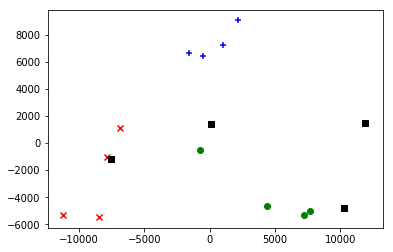

In [23]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],marker=markerTypes[foodType],c=colors[foodType])

### Extra Credit

In [107]:
import pandas as pd

prof = pd.read_csv('country_profile_variables.csv')
#prof.select_dtypes(['number']).head()
#prof = pd.concat([profDat['Region'],prof.select_dtypes(['number'])],axis=1)
prof.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [108]:
from sklearn.preprocessing import normalize

numComponents = 2

pca = PCA(numComponents)
#data = normalize(prof.select_dtypes(['number']), axis=0, norm='max')
pca.fit(normalize(prof.select_dtypes(['number']), axis=0, norm='max'))
projected = pca.transform(normalize(prof.select_dtypes(['number']), axis=0, norm='max'))

projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(0,len(prof)))
projected['region'] = prof['Region']
projected.head()

,pc1,pc2,region
0,-1.225279,0.101471,SouthernAsia
1,-1.080330,0.048536,SouthernEurope
2,-1.221848,-0.069134,NorthernAfrica
3,5.664929,0.996393,Polynesia
4,-1.125041,0.017737,SouthernEurope


22


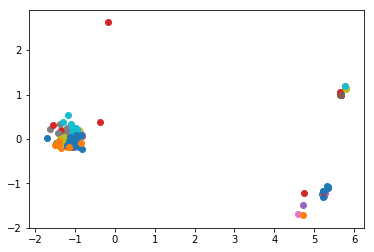

In [115]:
print(len(np.unique(projected['region'])))

for reg in np.unique(projected['region']):
    d = projected[projected['region']==reg]
    
    plt.scatter(d['pc1'],d['pc2'])


Above is the normalized data projected onto two dimensions with different regions labaled by color.

#### Question 2
## Decision Tree 

In [24]:
# Load the dataset

import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [28]:
# Pre-processing data

# convert the classes to be binary: replacing fishes, birds, amphibians and retiles as non-mammals

data['Class'] = np.where(data['Class'] == 'mammals','mammals','non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [29]:
# Pandas provides a function cross-tabulation that can examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class.
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given in the next subsection.

In [58]:
# apply a decision tree classifier to the vertebrate dataset described in the previous subsection.

from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3,min_samples_split=3,min_samples_leaf=1)
clf = clf.fit(X, Y)

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

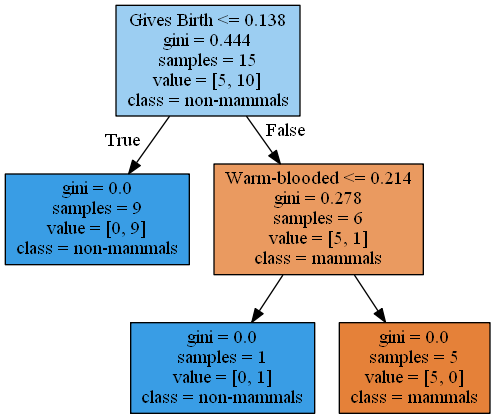

In [59]:
# visualizing the tree

import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Next, suppose we apply the decision tree to classify the following test examples.

In [60]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [62]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [63]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75
